In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

In [188]:
# 병원 - 영업상태명에서 휴업, 폐업인 병원 제거
# 좌표 x, y 가져와서 구글맵에 찍어
# 의원 - 상세영업상태명에서 영업중만 남기기
# 진료과목내용명에서 소아청소년과만 남기기
# 의원수 신경 안쓰기

In [189]:
# 시·군·구별_근로소득_연말정산_신고현황.csv

income = pd.read_csv('4.2.15_시·군·구별_근로소득_연말정산_신고현황_주소지_2016_20231123093654.csv', encoding='UTF-8', skiprows=2)
income

,행정구역(시군구)별(1),행정구역(시군구)별(2),인원 (명),금액 (백만원),인원 (명).1,금액 (백만원).1,인원 (명).2,금액 (백만원).2,인원 (명).3,금액 (백만원).3
0,전국,소계,19959148,807198885,19907727,803208612,17857818,455957519,12919174,52698621
1,서울,소계,3952583,184858796,3944244,184066506,3537573,113851288,2565528,17333494
2,서울,강남구,215632,17477665,215441,17417230,197339,12781199,156295,2932330
3,서울,강동구,192080,8488374,191800,8449977,172314,5005361,126135,630369
4,서울,강북구,105489,3274497,105266,3259552,91807,1661978,61474,135266
...,...,...,...,...,...,...,...,...,...,...
242,경남,합천군,9838,317420,9816,316507,8846,162244,6086,11417
243,제주,소계,232571,7985643,232345,7951570,207655,4141826,142908,375971
244,제주,제주시,175810,6064037,175652,6039377,157106,3132000,107941,277434
245,제주,서귀포시,56761,1921607,56693,1912193,50549,1009826,34967,98537


In [190]:
# 행정구역(시군구)별(1), 행정구역(시군구)별(2), 급여 총계 인원(명), 급여 총계 금액(백만원)만 남기기
income:pd.DataFrame = income.iloc[:, :4]
income.columns = ['시/도', '자치구', '인원(명)', '총 급여(백만원)']
income

,시/도,자치구,인원(명),총 급여(백만원)
0,전국,소계,19959148,807198885
1,서울,소계,3952583,184858796
2,서울,강남구,215632,17477665
3,서울,강동구,192080,8488374
4,서울,강북구,105489,3274497
...,...,...,...,...
242,경남,합천군,9838,317420
243,제주,소계,232571,7985643
244,제주,제주시,175810,6064037
245,제주,서귀포시,56761,1921607


In [191]:
# 시군구1에서 서울만 남기기
income = income.loc[(income['시/도'] == '서울') & (income['자치구'] != '소계')].reset_index(drop=True)
print(income['자치구'].unique().size)
income

25


,시/도,자치구,인원(명),총 급여(백만원)
0,서울,강남구,215632,17477665
1,서울,강동구,192080,8488374
2,서울,강북구,105489,3274497
3,서울,강서구,252396,9964209
4,서울,관악구,224352,7550177
5,서울,광진구,150149,6121949
6,서울,구로구,174004,6504808
7,서울,금천구,104225,3388533
8,서울,노원구,194250,7784253
9,서울,도봉구,118133,4009934


In [192]:
# 1인당 총 급여 구하기 (1년 총 급여)
income['1인당 총 급여'] = np.round(income['총 급여(백만원)'] * 1000000 / income['인원(명)'])
income

,시/도,자치구,인원(명),총 급여(백만원),1인당 총 급여
0,서울,강남구,215632,17477665,81053206.0
1,서울,강동구,192080,8488374,44191868.0
2,서울,강북구,105489,3274497,31041123.0
3,서울,강서구,252396,9964209,39478474.0
4,서울,관악구,224352,7550177,33653264.0
5,서울,광진구,150149,6121949,40772493.0
6,서울,구로구,174004,6504808,37383095.0
7,서울,금천구,104225,3388533,32511710.0
8,서울,노원구,194250,7784253,40073375.0
9,서울,도봉구,118133,4009934,33944232.0


In [193]:
# 소계 제외하고 1인당 총 급여 높은 순으로 정렬
income = income.sort_values(by='1인당 총 급여', ascending=False).reset_index(drop=True)
income

,시/도,자치구,인원(명),총 급여(백만원),1인당 총 급여
0,서울,강남구,215632,17477665,81053206.0
1,서울,서초구,169405,13638923,80510746.0
2,서울,용산구,96680,6747813,69795335.0
3,서울,송파구,288952,16095685,55703664.0
4,서울,성동구,118248,6207800,52498140.0
5,서울,종로구,54388,2840850,52233029.0
6,서울,마포구,160890,8245601,51249929.0
7,서울,중구,49447,2447593,49499323.0
8,서울,양천구,178304,8806702,49391500.0
9,서울,영등포구,180393,8559698,47450278.0


In [194]:
# 병원 데이터 전처리
hospital = pd.read_csv('[필수활용01]서울시_병원정보.csv', encoding='EUC-KR')

# 병원 종류 살펴보기
print(hospital['의료기관종별명'].value_counts(), '\n')

# 진료과목 null값 확인
print("진료과목내용명 null 개수:", hospital['진료과목내용명'].isnull().sum(), '\n')

# 소아청소년과 병원 영업 상태 확인
hospital = hospital[(hospital['의료기관종별명'].isin(['병원', '한방병원', '종합병원'])) & (hospital['진료과목내용명'].str.contains('소아청소년과'))]
print(hospital['상세영업상태명'].value_counts(), '\n')

# 영업중인 소아청소년과 병원 정보만 남기기
hospital = hospital[hospital['상세영업상태명'] == '영업중']

의료기관종별명
병원                 324
요양병원(일반요양병원)       172
한방병원               112
치과병원               105
종합병원                58
요양병원(노인병원)           4
요양병원(정신병원)           2
요양병원(장애인의료재활시설)      1
Name: count, dtype: int64 

진료과목내용명 null 개수: 0 

상세영업상태명
영업중     123
폐업       29
휴업        1
직권폐업      1
Name: count, dtype: int64 



In [195]:
# 병원 데이터의 시군구명 구하기
print(hospital['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique())
print(len(set(hospital['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique()) - set(income['자치구'].unique())) == 0)

hospital['자치구'] = hospital['도로명전체주소'].apply(lambda x:x.split(" ")[1])

['중랑구' '영등포구' '서초구' '성동구' '광진구' '은평구' '강남구' '강서구' '노원구' '관악구' '종로구' '서대문구'
 '송파구' '마포구' '강동구' '동대문구' '강북구' '도봉구' '금천구' '양천구' '중구' '동작구' '구로구' '성북구'
 '용산구']
True


In [196]:
hospital['의료기관종별명'].value_counts()

의료기관종별명
병원      64
종합병원    50
한방병원     9
Name: count, dtype: int64

In [197]:
# 자치구별로 병원 개수 구하기
hospital['자치구'].value_counts()

자치구
강남구     10
노원구      9
중랑구      8
은평구      8
강서구      8
동대문구     7
구로구      6
종로구      6
영등포구     6
서초구      5
광진구      5
동작구      5
양천구      5
도봉구      5
강동구      5
송파구      4
서대문구     4
관악구      4
중구       3
성북구      3
성동구      2
용산구      2
강북구      1
마포구      1
금천구      1
Name: count, dtype: int64

In [198]:
# 소득 데이터와 병원 개수 데이터 합치기
count_by_area = income[['자치구', '1인당 총 급여']].join(hospital['자치구'].value_counts(), on='자치구', how='left').rename(columns={'count':'소아청소년과 병원 수'})
count_by_area

,자치구,1인당 총 급여,소아청소년과 병원 수
0,강남구,81053206.0,10
1,서초구,80510746.0,5
2,용산구,69795335.0,2
3,송파구,55703664.0,4
4,성동구,52498140.0,2
5,종로구,52233029.0,6
6,마포구,51249929.0,1
7,중구,49499323.0,3
8,양천구,49391500.0,5
9,영등포구,47450278.0,6


# 

In [199]:
# 의원 데이터 전처리
clinic = pd.read_csv('[필수활용02]서울시_의원정보.csv', encoding='cp949')

# 영업중인 의원 정보만 남기기
clinic = clinic[clinic['상세영업상태명'] == '영업중']

# 보건소 보건지소 치과 제거 & 소아청소년과만 남기기
clinic = clinic[(clinic['의료기관종별명'].isin(['의원', '한의원'])) & (clinic['진료과목내용명'].str.contains('소아청소년과'))]

In [200]:
# 의원 데이터의 시군구명 구하기
print(len(clinic))

# 주소가 이상하게 표기되어 있는 데이터 제거 
print(clinic[~clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).isin(income['자치구'].unique())]['도로명전체주소'].values)
clinic = clinic[clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).isin(income['자치구'].unique())]
print(clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique())
print(len(set(clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1]).unique()) - set(income['자치구'].unique())) == 0)

clinic['자치구'] = clinic['도로명전체주소'].apply(lambda x:x.split(" ")[1])

print(len(clinic))


3047
[]
['구로구' '중랑구' '중구' '양천구' '용산구' '은평구' '서초구' '송파구' '성동구' '종로구' '영등포구' '강남구'
 '금천구' '마포구' '광진구' '서대문구' '성북구' '동대문구' '강동구' '강서구' '동작구' '도봉구' '강북구' '관악구'
 '노원구']
True
3047


In [201]:
clinic['의료기관종별명'].value_counts()

의료기관종별명
의원    3047
Name: count, dtype: int64

In [202]:
# 자치구별로 의원 개수 구하기
clinic['자치구'].value_counts()

자치구
송파구     257
강남구     201
강서구     197
은평구     156
광진구     141
서초구     141
영등포구    136
구로구     133
마포구     131
중랑구     124
노원구     124
동작구     122
관악구     122
강북구     119
동대문구    118
강동구     116
성동구     114
양천구     101
성북구      99
도봉구      81
금천구      73
서대문구     67
용산구      66
중구       59
종로구      49
Name: count, dtype: int64

In [203]:
# 소득 데이터와 의원 개수 데이터 합치기
count_by_area = count_by_area.join(clinic['자치구'].value_counts(), on='자치구', how='left').rename(columns={'count':'소아청소년과 의원 수'})
count_by_area


,자치구,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수
0,강남구,81053206.0,10,201
1,서초구,80510746.0,5,141
2,용산구,69795335.0,2,66
3,송파구,55703664.0,4,257
4,성동구,52498140.0,2,114
5,종로구,52233029.0,6,49
6,마포구,51249929.0,1,131
7,중구,49499323.0,3,59
8,양천구,49391500.0,5,101
9,영등포구,47450278.0,6,136


In [216]:
count_by_area.describe()

,1인당 총 급여,소아청소년과 병원 수,소아청소년과 의원 수
count,2.500000e+01,25.000000,25.000000
mean,4.644391e+07,4.920000,121.880000
std,1.359716e+07,2.515287,46.997624
min,3.104112e+07,1.000000,49.000000
25%,3.738310e+07,3.000000,99.000000
50%,4.418890e+07,5.000000,122.000000
75%,5.124993e+07,6.000000,136.000000
max,8.105321e+07,10.000000,257.000000


## 지역별 소득 수준 EDA

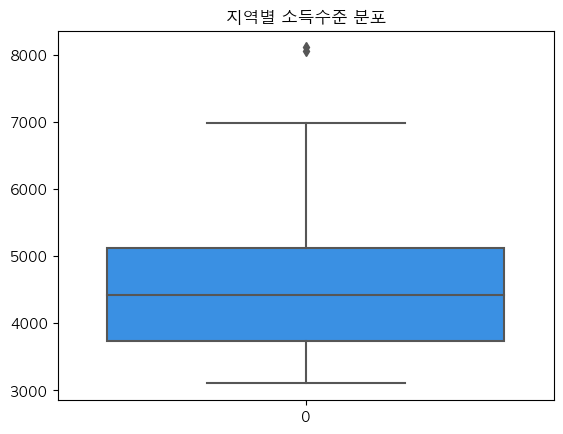

In [252]:
sns.boxplot(count_by_area['1인당 총 급여'] / 10000, color='dodgerblue')
plt.title('지역별 소득수준 분포')
plt.show()

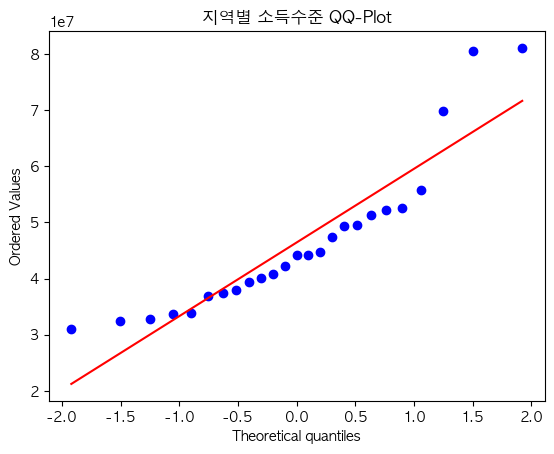

In [246]:
from scipy.stats import probplot

probplot(count_by_area['1인당 총 급여'], plot=plt)
plt.title('지역별 소득수준 QQ-Plot')
plt.show()

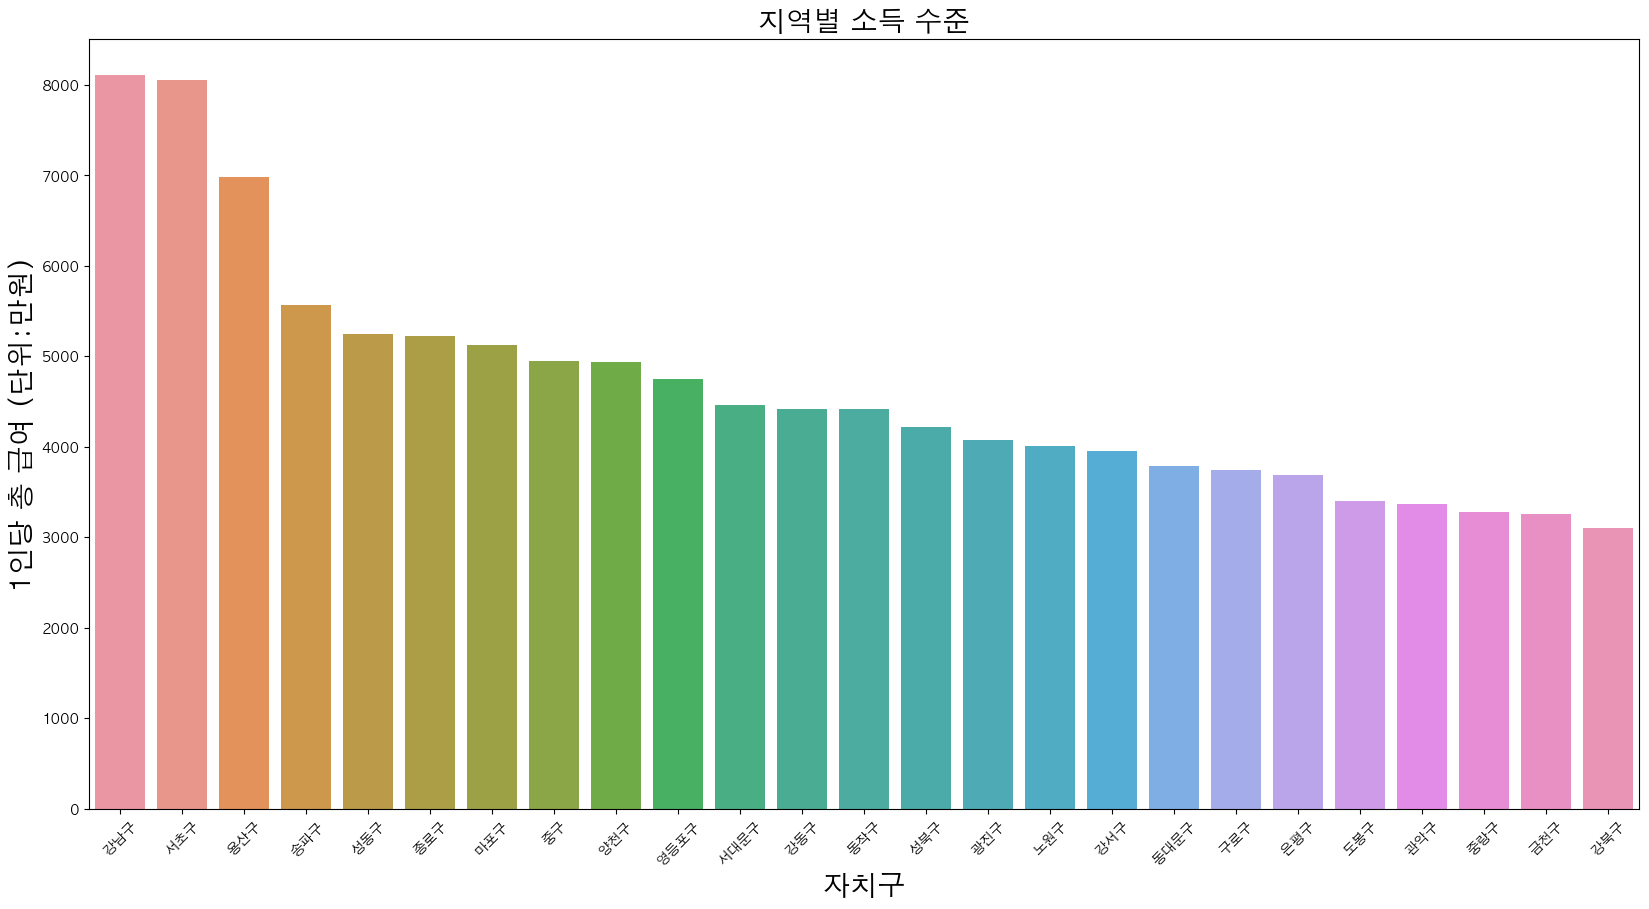

In [238]:
# EDA
# 지역별 소득 수준 시각화
plt.figure(figsize=(20, 10))
# sns.barplot(data=count_by_area, x='자치구', y='1인당 총 급여')
sns.barplot(x=count_by_area['자치구'], y=count_by_area['1인당 총 급여'] / 10000)
plt.xticks(rotation=45)
plt.xlabel('자치구', fontsize=20)
plt.ylabel('1인당 총 급여 (단위:만원)', fontsize=20)
plt.title('지역별 소득 수준', fontsize=20)
plt.show()

## 가설 01: 지역의 소득 수준과 소아청소년과 병원의 개수는 관련이 있을 것이다.

In [205]:
from scipy.stats import pearsonr

pearsonr(count_by_area['1인당 총 급여'], count_by_area['소아청소년과 병원 수'])

PearsonRResult(statistic=0.06753461215520816, pvalue=0.7483984365532081)

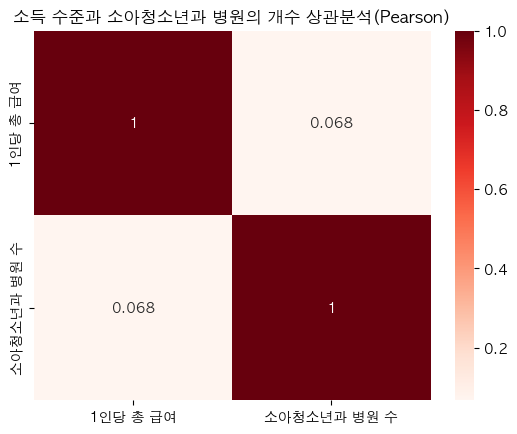

In [223]:
sns.heatmap(count_by_area[['1인당 총 급여', '소아청소년과 병원 수']].corr( method='pearson'), annot=True, cmap='Reds')
plt.title('소득 수준과 소아청소년과 병원의 개수 상관분석(Pearson)')
plt.show()

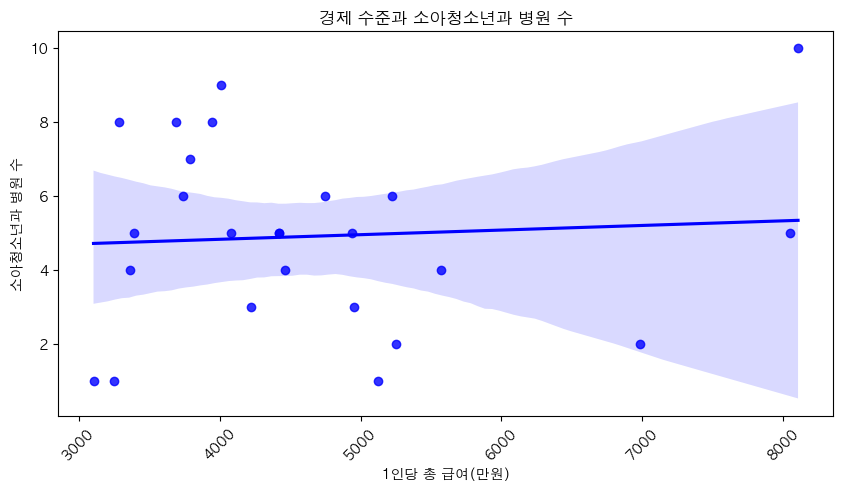

In [219]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='소아청소년과 병원 수', color='blue')
plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('경제 수준과 소아청소년과 병원 수')



plt.show()

### 가설 검정 01 결론: 경제 수준과 소아청소년과 병원의 수가 연관이 있다고 보기는 어렵다. <br />
pearson 상관 계수 결과 p-value 0.7, statistic 0.06으로 나왔다. <br />
또한 시각화를 해봤을 때에도 뚜렷한 상관성을 찾지 못했다.

In [225]:
from scipy.stats import pearsonr

pearsonr(count_by_area['1인당 총 급여'], count_by_area['소아청소년과 의원 수'])

PearsonRResult(statistic=0.1986954841756121, pvalue=0.34101833818291766)

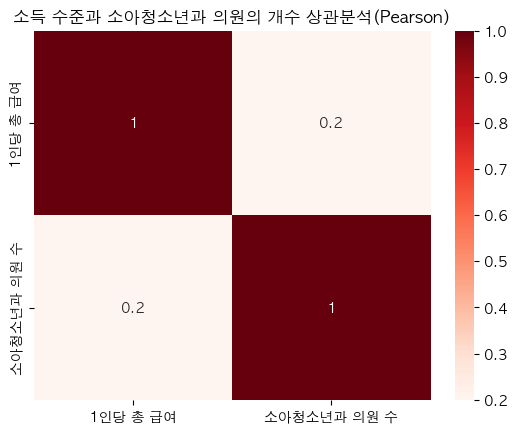

In [224]:
sns.heatmap(count_by_area[['1인당 총 급여', '소아청소년과 의원 수']].corr( method='pearson'), annot=True, cmap='Reds')
plt.title('소득 수준과 소아청소년과 의원의 개수 상관분석(Pearson)')
plt.show()

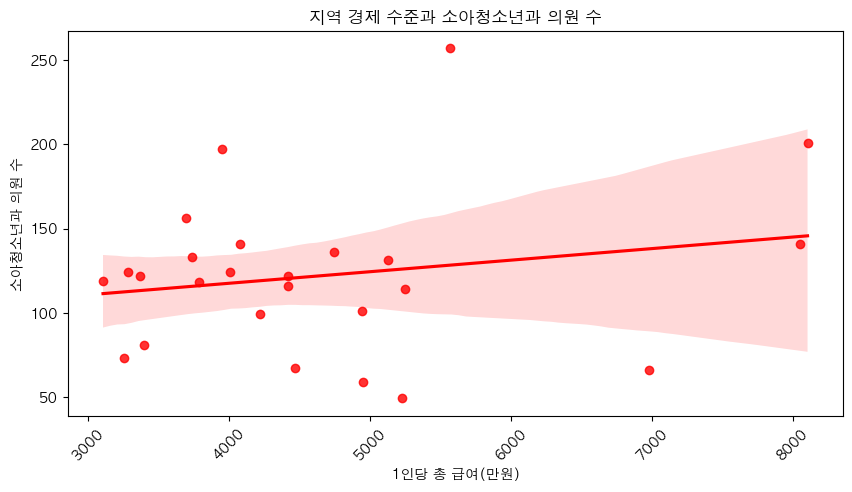

In [211]:
plt.figure(figsize=(10, 5))
sns.regplot(data=count_by_area, x=np.round(count_by_area['1인당 총 급여'] / 10000, 0), y='소아청소년과 의원 수', color='red')
plt.xticks(rotation=45)
plt.xlabel('1인당 총 급여(만원)')
plt.title('지역 경제 수준과 소아청소년과 의원 수')
plt.show()

### 가설 검정 02 결론: 경제 수준과 소아청소년과 의원의 수가 연관이 있다고 보기는 어렵다. <br />
pearson 상관 계수 결과 p-value 0.19, statistic 0.34로 나왔다. <br />
또한 시각화를 해봤을 때에도 뚜렷한 상관성을 찾지 못했다.